# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [48]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [49]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [50]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
from sklearn.model_selection import train_test_split
X= data.drop("MEDV", axis=1)
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [9]:
from sklearn.linear_model import LinearRegression

data_LR= LinearRegression()

data_LR.fit(X_train, y_train)
y_pred= data_LR.predict(X_test)
y_pred_training= data_LR.predict(X_train)



## 3. Calculate and print R-squared for both the training and the testing set.

In [12]:
from sklearn.metrics import r2_score

# For training set
r2_train = r2_score(y_train, y_pred_training)
print("R-squared for Training Set:", r2_train)

# For testing set
r2_test = r2_score(y_test, y_pred)
print("R-squared for Testing Set:", r2_test)


# Using the score method directly on the model
r2_train = data_LR.score(X_train, y_train)
r2_test = data_LR.score(X_test, y_test)
print("R-squared for Training Set:", r2_train)
print("R-squared for Testing Set:", r2_test)


R-squared for Training Set: 0.7508856358979673
R-squared for Testing Set: 0.6687594935356307
R-squared for Training Set: 0.7508856358979673
R-squared for Testing Set: 0.6687594935356307


## 4. Calculate and print mean squared error for both the training and the testing set.

In [13]:
from sklearn.metrics import mean_squared_error

# For training set
mse_train = mean_squared_error(y_train, y_pred_training)
print("Mean Squared Error for Training Set:", mse_train)

# For testing set
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Testing Set:", mse_test)


Mean Squared Error for Training Set: 21.641412753226312
Mean Squared Error for Testing Set: 24.291119474973613


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [14]:
from sklearn.metrics import mean_absolute_error

# For training set
mae_train = mean_absolute_error(y_train, y_pred_training)
print("Mean Absolute Error for Training Set:", mae_train)

# For testing set
mae_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for Testing Set:", mae_test)


Mean Absolute Error for Training Set: 3.314771626783227
Mean Absolute Error for Testing Set: 3.189091965887852


## Classification Model Evaluation

In [15]:
from sklearn.datasets import load_iris
data = load_iris()

In [16]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
column_names = data.feature_names

In [18]:
df = pd.DataFrame(data['data'],columns=column_names)

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
target = pd.DataFrame(data.target)

In [21]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.linear_model import LogisticRegression

df_logistic= LogisticRegression(max_iter=10000)
df_logistic.fit(X_train, y_train)
y_pred= df_logistic.predict(X_test)
y_pred_training= df_logistic.predict(X_train)




## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_training_data = accuracy_score(y_train, y_pred_training)

print(f"Accuracy on the test set: {accuracy_test:.4f}")
print(f"Accuracy on the training set: {accuracy_training_data:.4f}")

Accuracy on the test set: 1.0000
Accuracy on the training set: 0.9750


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [30]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for test and training sets
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred)
balanced_accuracy_training = balanced_accuracy_score(y_train, y_pred_training)

# Print the balanced accuracy scores
print(f"Balanced Accuracy on the test set: {balanced_accuracy_test:.4f}")
print(f"Balanced Accuracy on the training set: {balanced_accuracy_training:.4f}")


Balanced Accuracy on the test set: 1.0000
Balanced Accuracy on the training set: 0.9756


## 10. Calculate and print the precision score for both the training and the testing set.

In [31]:
from sklearn.metrics import precision_score

# Precision score for the test set
precision_test = precision_score(y_test, y_pred, average='macro')
# Precision score for the training set
precision_train = precision_score(y_train, y_pred_training, average='macro')

# Print precision scores
print(f"Precision on the test set: {precision_test:.4f}")
print(f"Precision on the training set: {precision_train:.4f}")


Precision on the test set: 1.0000
Precision on the training set: 0.9762


## 11. Calculate and print the recall score for both the training and the testing set.

In [32]:
from sklearn.metrics import recall_score

# Recall score for the test set
recall_test = recall_score(y_test, y_pred, average='macro')
# Recall score for the training set
recall_train = recall_score(y_train, y_pred_training, average='macro')

# Print recall scores
print(f"Recall on the test set: {recall_test:.4f}")
print(f"Recall on the training set: {recall_train:.4f}")


Recall on the test set: 1.0000
Recall on the training set: 0.9756


## 12. Calculate and print the F1 score for both the training and the testing set.

In [34]:
from sklearn.metrics import f1_score

# F1 score for the test set
f1_test = f1_score(y_test, y_pred, average='macro')
# F1 score for the training set
f1_train = f1_score(y_train, y_pred_training, average='macro')

# Print F1 scores
print(f"F1 Score on the test set: {f1_test:.4f}")
print(f"F1 Score on the training set: {f1_train:.4f}")



F1 Score on the test set: 1.0000
F1 Score on the training set: 0.9750


## 13. Generate confusion matrices for both the training and the testing set.

In [37]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the test set
confusion_test = confusion_matrix(y_test, y_pred)
# Confusion matrix for the training set
confusion_train = confusion_matrix(y_train, y_pred_training)

# Print confusion matrices
print("Confusion Matrix for the test set:\n", confusion_test)
print("\nConfusion Matrix for the training set:\n", confusion_train)


Confusion Matrix for the test set:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix for the training set:
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]


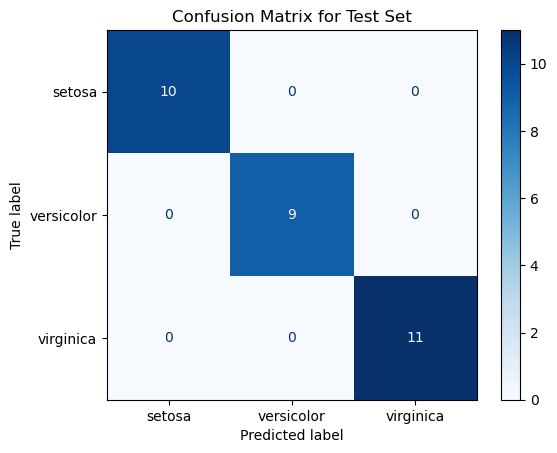

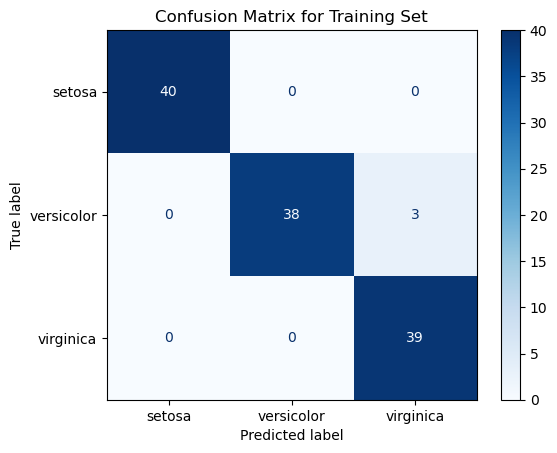

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and plot confusion matrix for the test set
disp_test = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=data['target_names'], # Use the target names from the Iris dataset
    cmap="Blues"
)

# Display the plot for the test set
plt.title("Confusion Matrix for Test Set")
plt.show()

# Generate and plot confusion matrix for the training set
disp_train = ConfusionMatrixDisplay.from_predictions(
    y_train, y_pred_training, 
    display_labels=data['target_names'], # Use the target names from the Iris dataset
    cmap="Blues"
)

# Display the plot for the training set
plt.title("Confusion Matrix for Training Set")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [51]:

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [52]:
data.shape

(506, 14)

In [54]:
from sklearn.model_selection import train_test_split
X= data.drop("MEDV", axis=1)
y = data["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:

from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
decision_tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Mean Squared Error: {mse_tree:.4f}")
print(f"Decision Tree - R-squared: {r2_tree:.4f}")



Decision Tree - Mean Squared Error: 8.5539
Decision Tree - R-squared: 0.8834


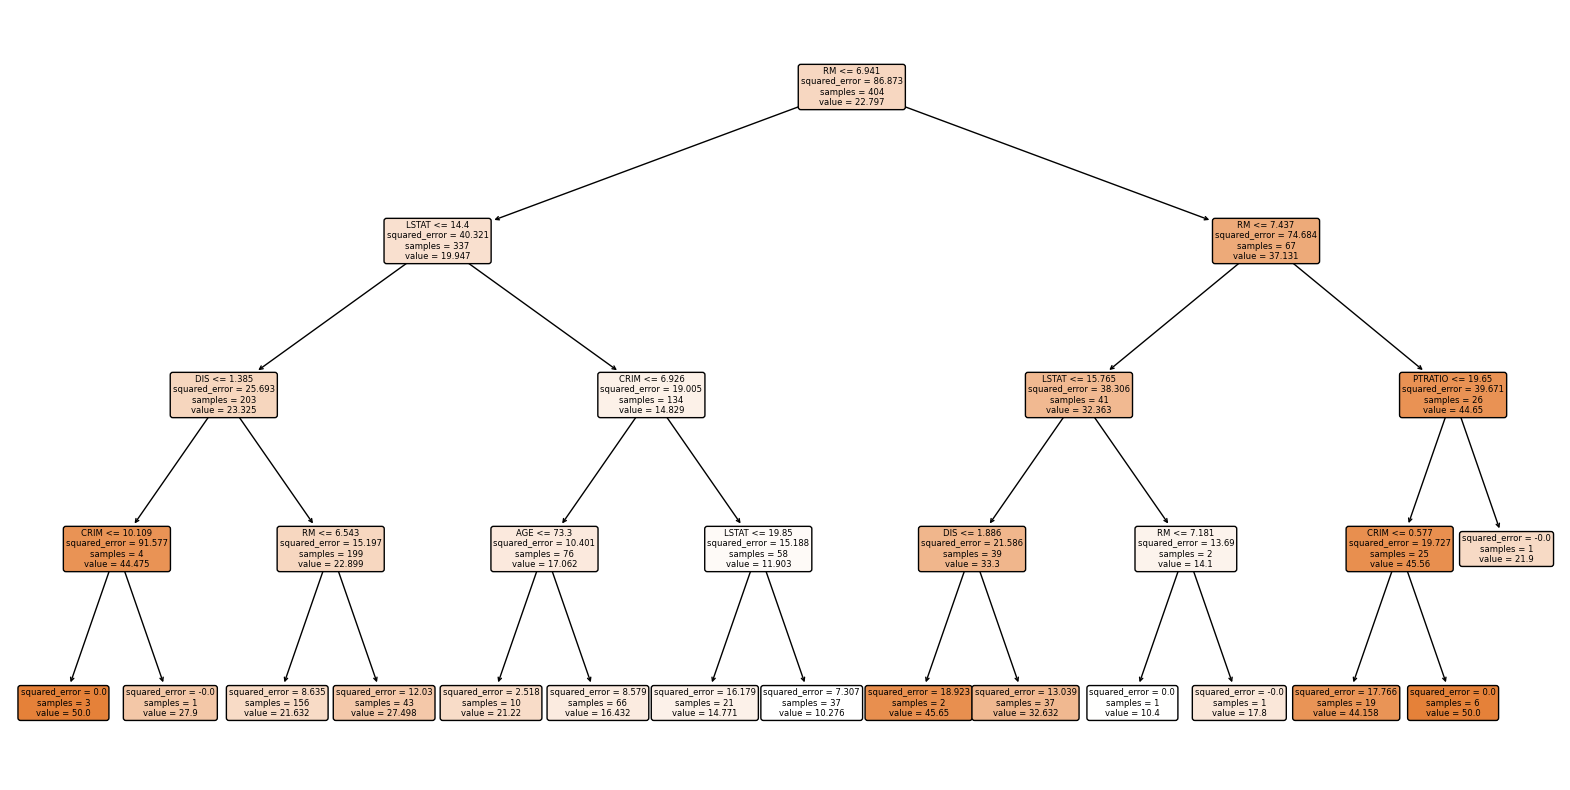

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
decision_tree_reg.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_reg, filled=True, feature_names=X.columns, rounded=True)
plt.show()


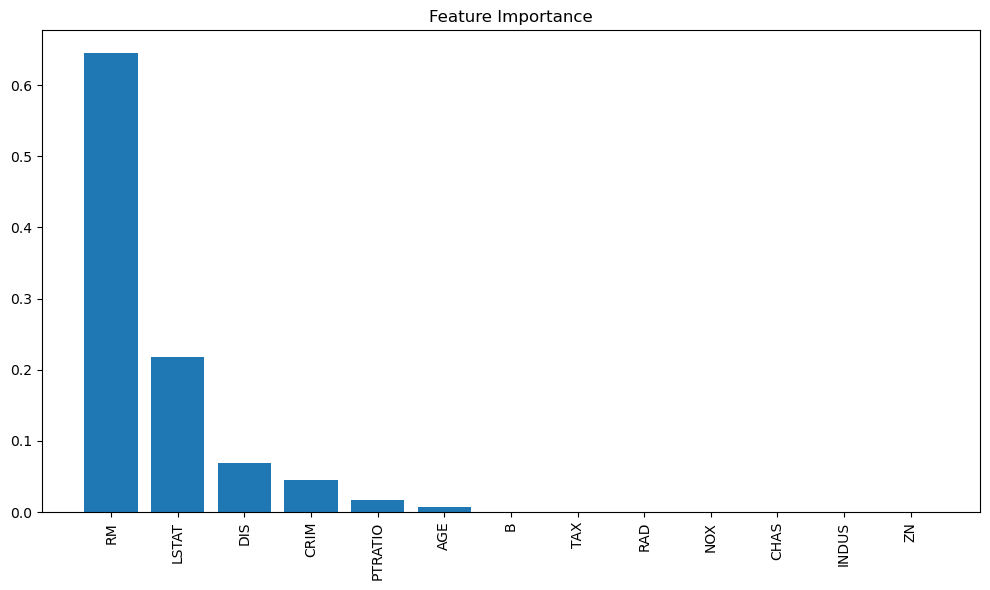

In [59]:
import numpy as np

# Get feature importance from the trained Decision Tree Regressor
importances = decision_tree_reg.feature_importances_

# Plot feature importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


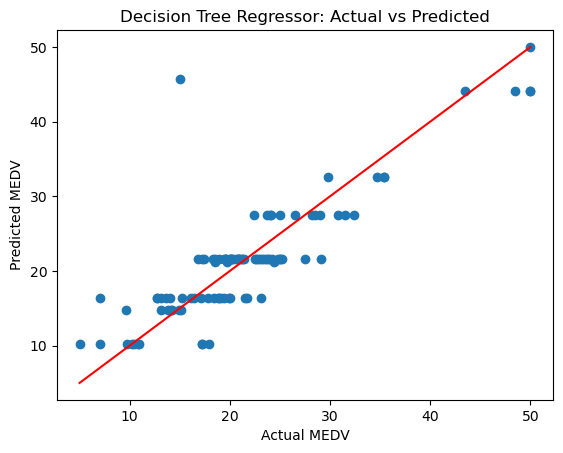

In [60]:
y_pred_tree = decision_tree_reg.predict(X_test)

plt.scatter(y_test, y_pred_tree)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.show()
